# Cumulative Distribution Functions


## The Limits of PMFs

PMFs work well if the *number of values is small*. 
As the number of values increases, the probability associated with each value *gets smaller* and the **effect of random noise increases**.

### Example: Distribution of Birth Weights (totalwgt_lb)
Compare distribution of birth weight between `Firsts` and `Others` babies.

**Interpretation**
Overall, these distributions resemble the bell shape of a *normal distribution*. 
  * Many values are near the mean.
  * Few values are much higher and lower.

Parts of this figure are hard to interpret; there are many spikes & valleys and some apparent differences between the distributions. It's difficult to tell which of these features are meaningful.

**Main Point**: Some patterns are hard to compare visually (**limitations of PMFs**).

### Solution to Limitations

1. **Binning the Data**: divide the range of values into *non-overlapping intervals* and counting the number of values in each bin.
  * Binning can be useful, but tricky to get the size of bins right. Should be big enough to *smooth out noise*, but not big enough to *smooth out useful info*.  
  
2. **Cumulative Distribution Function (CDF)**  
Pre-req: Percentiles

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nsfg
from statsmodels.distributions.empirical_distribution import ECDF

%matplotlib inline

In [2]:
def pmf(dictionary):
    """Takes a histogram dictionary (frequency) and 
    create a PMF dictionary (probabilities).
    
    """
    n = float(sum(dictionary.values()))
    pmf_d = {}

    for x,freq in dictionary.items():
        pmf_d[x] = freq / n # probability
    return pmf_d

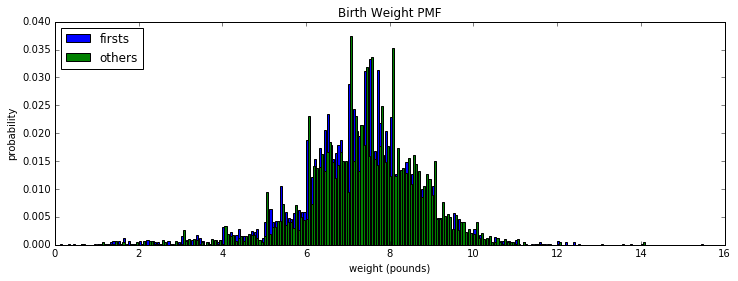

In [8]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
firsts_totalwgt = firsts['totalwgt_lb']
others_totalwgt = others['totalwgt_lb']

# Histogram - frequency
firsts_freq_wgt = firsts['totalwgt_lb'].value_counts().to_dict() # dictionary of values-freq
others_freq_wgt = others['totalwgt_lb'].value_counts().to_dict() # dictionary of values-freq

# PMF
firsts_pmf_wgt = pmf(firsts_freq_wgt)
others_pmf_wgt = pmf(others_freq_wgt)

# Plot
fig = plt.figure(figsize=(12, 4))
bar_width = 0.05
others_pmf_val=[bar_width + x for x in others_pmf_wgt.keys()]

plt.bar(firsts_pmf_wgt.keys(), firsts_pmf_wgt.values(), width=bar_width, 
        color='blue', label='firsts')
plt.bar(others_pmf_val, others_pmf_wgt.values(), width=bar_width, 
        color='green', label='others')
plt.xlabel('weight (pounds)')
plt.ylabel('probability')
plt.title('Birth Weight PMF')
plt.legend(loc='upper left')

plt.show()
plt.close(fig)

## Percentiles

### Percentile Rank
**Percentile Rank**: The percentage of values in a distribution that are *less than or equal to* a given value.  
  * rank of a value (*percentile*) in a given set of values.  
  

**Percentile**: The value associated with a given percentile rank.

#### Calculate Percentile Rank

`PercentileRank` function computes the percentile rank of a value (*your_score*) relative to the values in the sequence *scores*.

In [24]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score: # count is scores less than yours
            count += 1
    
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

#### Example: Standardized Test Scores
Results of standardized test scores are in the form of a raw score & a percentile rank. **Percentile rank** is the fraction of people who scored equal to or lower than you. 

90% percentile rank = you did as well as or better than 90% of the people.

In [33]:
scores_lst = [55,66,77,88,99]
my_score = 88

p_rank = PercentileRank(scores_lst, my_score)
print "Percentile Rank of my score is:", p_rank, "%"

Percentile Rank of my score is: 80.0 %


### Percentile (Value)
Easier to find the **percentile rank** given the value (**percentile**), but harder to find the value given the percentile rank.

#### Calculate Percentile
#### Method 1: `Percentile`
Sort the values & search for the desired value.

`Percentile` function takes a percentile rank and computes the corresponding percentile.

In [26]:
def Percentile(scores, percentile_rank):
    """Function takes two parameters, a sequence of 
    values (scores) and a percentile rank, to 
    calculate the corresponding value (percentile)."""
    
    scores.sort()
    for score in scores:
        if PercentileRank(scores, score) >= percentile_rank:
            return score

In [27]:
percentile = Percentile(scores_lst, 50.0) #find percentile rank 50%
percentile

77

The median is the `50th percentile`, which is 77.
  * The `50th percentile` is the value with a `percentile rank 50`.
  * `percentile`/value = 77

##### Method 2: `Percentile2`
More efficient method of computing the **percentile** (value).  
Use the **percentile rank** to compute the *index* of the corresponding percentile.

  
  
**Floor Division Operator**: `//`  
Division that takes the `floor` of the result (truncate).

In [28]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [29]:
percentile2 = Percentile2(scores_lst, 50)
percentile2

77

## Cumulative Distribution Function (CDF)
**CDF**: function that maps from a value (*percentile*) to its *percentile rank*.

The CDF is a function of `x`, where `x` is any value that might appear in the distribution. To evaluate `CDF(x)` for a particular value of `x`, we compute the fraction of values in the distribution *less than or equal to `x`*.

`EvalCDF` function is almost identical to `PercentileRank`, except that the result is a **probability** in the range 0-1 rather than a percentile rank (range 0.0 -100.0).
  * Calculates the **CDF** for a given value.
  

**Percentile (Value) <-- --> Percentile Rank / CDF** (Probability)
  * *p* = `CDF(x)`  
    Given a value (*percentile*) `x`, compute the probability `p`
  * **Inverse CDF**  
    Given a probability `p`, compute the corresponding value (*percentile*) `x`.

### Method 1: statsmodels ECDF

http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.distributions.empirical_distribution.ECDF.html

`from statsmodels.distributions.empirical_distribution import ECDF`

**Example**

In [12]:
sample = [1,2,2,3,5]
samp_ecdf =ECDF(sample)
samp_ecdf.y

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

### Method 2: `EvalCDF` function

In [4]:
def EvalCDF(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample) # float division
    return prob

#### Example

In [5]:
sample = [1,2,2,3,5]

cdf_0 = EvalCDF(sample,0)
cdf_0

0.0

Able to evaluate the CDF for any value, *not just the values in the sample*. If `x` is less than the *smallest* value in the sample, `CDF(0)` is 0.

In [6]:
cdf_6 = EvalCDF(sample, 6)

print "CDF(6) = ", cdf_6

CDF(6) =  1.0


Any `x` value greater than the largest value in the sample has `CDF(x)` = 1.

In [39]:
cdf_1 = EvalCDF(sample,1)
cdf_2 = EvalCDF(sample,2)
cdf_3 = EvalCDF(sample,3)
cdf_4 = EvalCDF(sample,4)
cdf_5 = EvalCDF(sample,5)

print "CDF(1) = ", cdf_1
print "CDF(2) = ", cdf_2
print "CDF(3) = ", cdf_3
print "CDF(4) = ", cdf_4
print "CDF(5) = ", cdf_5

CDF(1) =  0.2
CDF(2) =  0.6
CDF(3) =  0.8
CDF(4) =  0.8
CDF(5) =  1.0


[1, 2, 2, 3, 5]


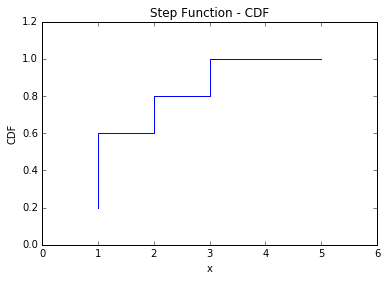

In [45]:
print sample # percentiles
cdf_y = [cdf_1, cdf_2, cdf_2, cdf_3, cdf_5] # CDF (percentile rank)
plt.step(sample, cdf_y)
plt.xlabel('x')
plt.ylabel('CDF')
plt.xlim([0, 6])
plt.ylim([0, 1.2])
plt.title('Step Function - CDF')
plt.show()
plt.close(fig)

## Representing CDFs

**Step** or **line plots** of CDFs provide a visual representation of the *shape of distribution*. These visualizations provide more information, more clearly, than **PMFs**.

#### CDFs vs. PMFs
  * **CDF**: probability [0, 1] of value's *percentile rank*
  * **PMF**: probability [0, 1] of value's *frequency*.

**How to Interpret CDF Plots**  
  * Look up percentiles.
  * Common values appear as steep or vertical sections of the CDF plot.

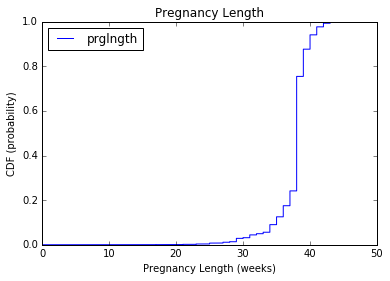

In [46]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
live_prglngth = live['prglngth'].sort_values()

prglngth_cdf = [] # accumulate each value's CDF
for value in live_prglngth:
    prglngth_cdf += [EvalCDF(live_prglngth, value)]

plt.step(live_prglngth, prglngth_cdf, label='prglngth')
plt.xlabel('Pregnancy Length (weeks)')
plt.ylabel('CDF (probability)') # prob of percentile rank
plt.title('Pregnancy Length')
plt.legend(loc='upper left')
plt.show()

**Interpretation**
  * 10% of pregnancies are *shorter* than 36 weeks.
  * 90% of pregnancies are *shorter* than 41 weeks.
  * Mode is at 39 weeks (steep/vertical section).
  * Few values < 30 weeks, CDF in this range is flat.


## Comparing CDFs
CDFs are useful for *comparing distributions*. For example, comparing CDF plots.

#### Example: Birth Weights (Firsts vs. Others)

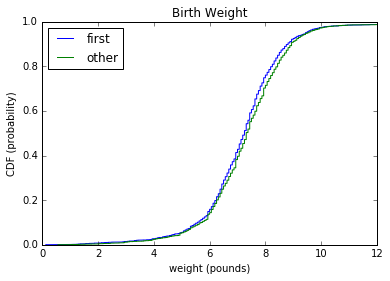

In [47]:
preg = nsfg.ReadFemPreg() # DataFrame
live = preg[preg.outcome==1] # filter for live births
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

# sort
firsts_wgt = firsts['totalwgt_lb'].sort_values()
others_wgt = others['totalwgt_lb'].sort_values()

# accumulate each value's CDF
wgt_cdf_f = [] 
for value in firsts_wgt:
    wgt_cdf_f += [EvalCDF(firsts_wgt, value)]

wgt_cdf_o = []
for value in others_wgt:
    wgt_cdf_o += [EvalCDF(others_wgt, value)]

# Plot (x: value - weight, y: CDF - probability)
plt.step(firsts_wgt, wgt_cdf_f, label='first')
plt.step(others_wgt, wgt_cdf_o, label='other')
plt.xlabel('weight (pounds)')
plt.ylabel('CDF (probability)')
plt.xlim([0,12])
plt.title('Birth Weight')
plt.legend(loc='upper left')
plt.show()

**Interpretation**
Comparing the shape of the CDF distributions between the 2 groups (`Firsts` vs. `Others`) is more apparent.
  * Firsts babies are *slightly lighter* throughout the distribution.
  * Firsts babies have a larger discrepancy above the mean.

## Percentile-based Statistics
Can use CDF to compute percentile-based statistics by first computing *percentiles* & *percentile ranks*.  
  * **Percentile Rank**: `100.0 * CDF(x)`
  * **Percentile**: corresponding value for each CDF
    * alternative: given `PercentileRank`, compute corresponding value `x` (percentile).

In [14]:
def cdf_to_PercentileRank(sample, x):
    """Returns the percentile rank of the value x.

    x: potential value in the CDF

    returns: percentile rank in the range 0 to 100
    """
    return EvalCdf(sample, x) * 100.0

##### Percentiles used to compute percentile-beased summary statistics
  * **Median**: also known as the 50th percentile (50% percentile rank)
    * divides the distribution in half
    * Like the **mean**, the median is a measure of the **central tendency** of a distribution.
  * **Interquartile Range (IQR)**: measure of the spread of distribution
     * the *difference between the 75th & 25th percentiles*.
     * interval range from **25th** to **75th** percentile   
     `iqr = (25th percentile/value, 75th percentile/value)`

**Percentiles** are often used to summarize the *shape of a distribution*.


## Random Numbers


What would distribution look like, if a *random sample* was taken from a population and then looking up the percentile rank of each value?

Sampling *with replacement* (same value can be chose more than once) produces a **uniform distribution**.
  * 10% of the sample is below the 10th percentile, 20% is below the 20th percentile, ...



### Example: Random Sampling of Birth Weights
Suppose we choose a *random sample with replacement* from the population of live births. Then, look up the **percentile rank** of their birth weights ("their" = random sample/sub-set).

What will the distribution look like?

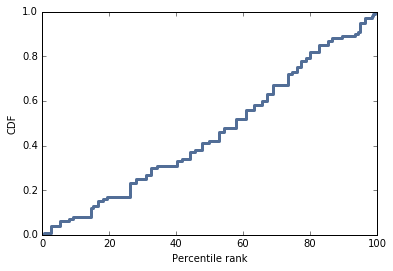

In [71]:
import thinkstats2
import thinkplot

# Compute CDF based on original sample
weights = live.totalwgt_lb
live_cdf = thinkstats2.Cdf(weights, label='live')

# Generate random sample with replacement
sample = np.random.choice(weights, 100, replace=True) # generate random sample
ranks = [live_cdf.PercentileRank(x) for x in sample] # calculate percentile rank of random sample

rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Config(xlabel='Percentile rank', ylabel='CDF')

None


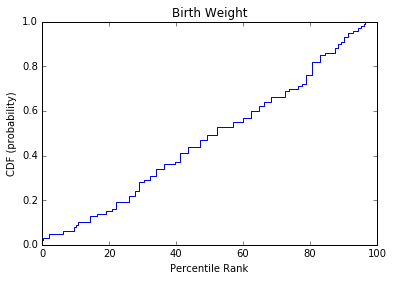

In [72]:
weights = live['totalwgt_lb'].sort_values() # original sample -- CDF calculation

# accumulate each value's CDF from the random sample
sample = np.random.choice(weights, 100, replace=True) # generate random sample

wgt_cdf = [] 
for value in sample:
    wgt_cdf += [EvalCDF(weights, value)]
    
# Convert CDFs to Percentile Ranks
rand_rank = []
for cdf_val in  wgt_cdf:
    rand_rank += [cdf_to_PercentileRank(cdf_val)]
    
print rand_rank.sort()
# Calculate CDF of random generated sample based on Percentile Rank
rand_cdf = []
for rand_val in rand_rank:
    rand_cdf += [EvalCDF(rand_rank, rand_val)]

# Plot (x: value - weight, y: CDF - probability)
plt.step(rand_rank, rand_cdf)
plt.xlabel('Percentile Rank')
plt.ylabel('CDF (probability)')
plt.title('Birth Weight')
plt.show()

## Comparing Percentile Ranks

**Percentile Ranks** ar useful for comparing measurements *across different groups*.

### Example: Compare Marathon Races by Groups (Age)
To compare people in different age groups, you can convert race times to **percentile ranks**.

**Goal**: If person A's percentile rank for his race time was 90% in the age group (40-49), what would his time (value) have to be  to maintain that percentile for the next age group (50-59) in 10 years?

##### Find Percentile based on Race Position for Age Group 40-49
Person A came in 16th place out of 256. What is his percentile for that age group in the race?

**Tip**: Use **percentile**/value (race position) to find **percentile rank**.

Percentile Rank enables fair comparison across different groups as it describes their position relative to the distribution of their groups.

In [88]:
def PositionToPercentile(position, sample_size):
    beat = sample_size - position + 1 # position to beat racers
    percentile = 100.0 * beat / sample_size
    return percentile

In [92]:
PositionToPercentile(16, 256)

94.140625

Person A was in the 94% percentile (94% percentile rank) by having a race tie with a position of 16th (value)

#### Find Position (value) based on Percentile
Person A wants to maintain his percentile when he races in the next age group in 10 years for that race. What must his race position be?

This race had 171 people.

**Tip**: Use **percentile rank** to compute equivalent **percentile**/value (race position) in the new group.

In [93]:
def PercentileToPosition(percentile, sample_size):
    beat = percentile * sample_size / 100.0
    position = sample_size - beat + 1
    return position

In [94]:
PercentileToPosition(94, 171)

11.259999999999991

Person A must come at 11th position (percentile/value) to maintain his percentile rank.